In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [25]:
# Loading and viewing dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [27]:
print(train_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [28]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [29]:
# replacing nulls
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df['Cabin'].fillna(train_df['Cabin'].mode()[0], inplace=True)

<ipython-input-29-ce3f447633f7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
<ipython-input-29-ce3f447633f7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [30]:
print(train_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [31]:
# Check for duplicates
train_df.duplicated().sum()

np.int64(0)

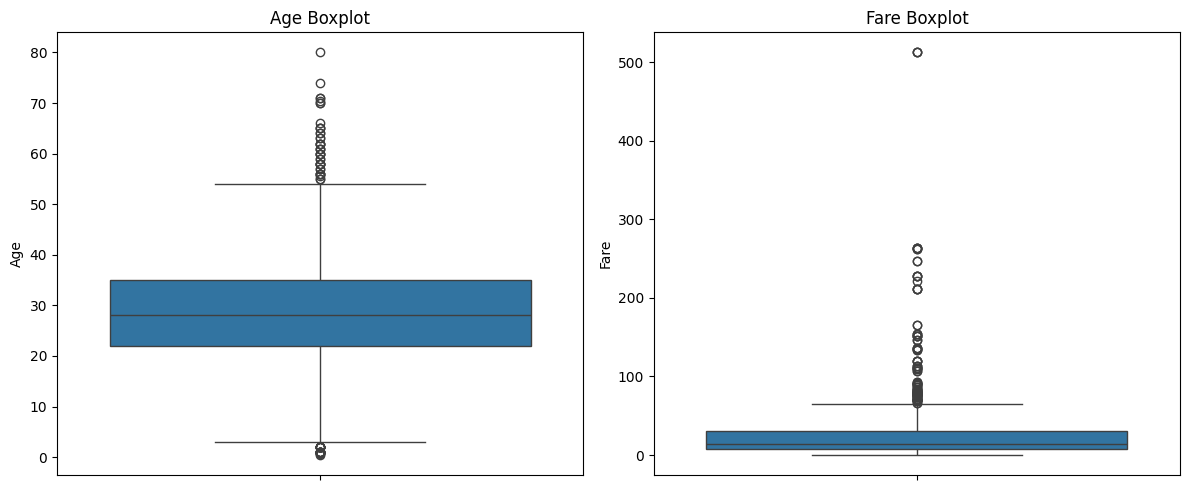

In [32]:
# Visually inspecting if there are any outliers
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y='Age', data=train_df)
plt.title('Age Boxplot')

plt.subplot(1, 2, 2)
sns.boxplot(y='Fare', data=train_df)
plt.title('Fare Boxplot')

plt.tight_layout()
plt.show()

In [33]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply on Age and Fare
train_df = remove_outliers(train_df, 'Age')
train_df = remove_outliers(train_df, 'Fare')

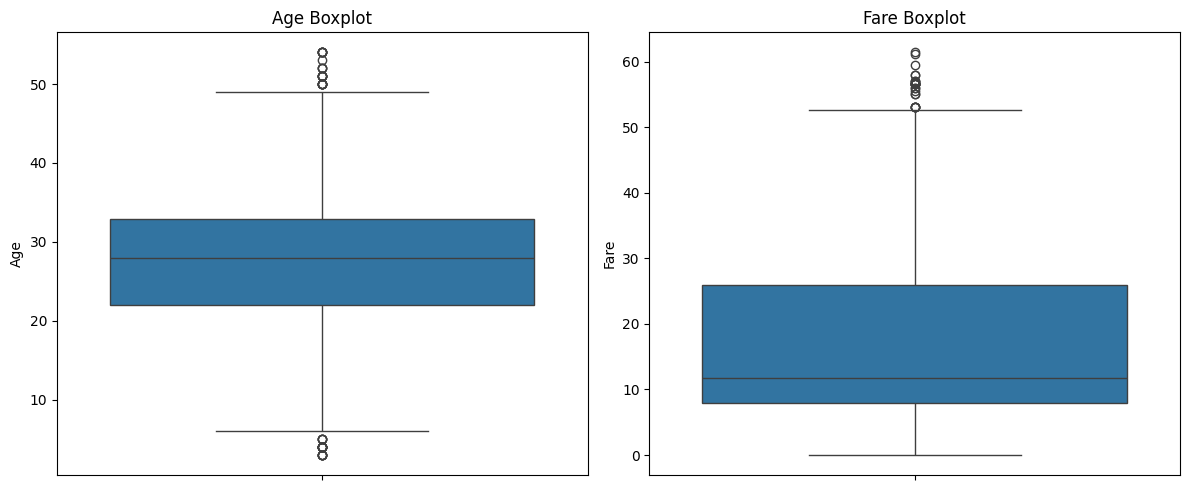

In [34]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y='Age', data=train_df)
plt.title('Age Boxplot')

plt.subplot(1, 2, 2)
sns.boxplot(y='Fare', data=train_df)
plt.title('Fare Boxplot')

plt.tight_layout()
plt.show()

In [35]:
#take a copy from data
train = train_df.copy()

# Dropping unnecessary columns
train.drop(['Ticket', 'Cabin', 'Name'], axis=1, inplace=True)

In [36]:
X = train.drop("Survived", axis=1)
y = train["Survived"]

# Splitting columns for pipeline
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

In [37]:
#Making pipelines
#Numerical
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

full_pip = ColumnTransformer([
    ('num', num_pipeline, numerical_cols),
    ('cat', cat_pipeline, categorical_cols)
])

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Split the data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
# pipeline for logistic
model = Pipeline([
    ('preprocessor', full_pip),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_valid)

In [39]:
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7708333333333334


In [40]:
precision = precision_score(y_valid, y_pred)
print("Precision:", precision)

Precision: 0.6818181818181818


In [41]:
recall = recall_score(y_valid, y_pred)
print("Recall:", recall)

Recall: 0.6122448979591837


In [42]:
f1 = f1_score(y_valid, y_pred)
print("F1 Score:", f1)

F1 Score: 0.6451612903225806


In [43]:
print("\nClassification Report:\n")
print(classification_report(y_valid, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        95
           1       0.68      0.61      0.65        49

    accuracy                           0.77       144
   macro avg       0.75      0.73      0.74       144
weighted avg       0.77      0.77      0.77       144



In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'classifier__n_estimators': [100, 200, 300, 500],
    'classifier__max_depth': [5, 10, 15, 20, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2', None]
}


In [45]:
rf_pipeline = Pipeline([
    ('preprocessor', full_pip),
    ('classifier', RandomForestClassifier(random_state=42))
])
random_search = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    scoring='f1',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit to training data
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [46]:
y_pred = best_model.predict(X_valid)

In [47]:
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8194444444444444


In [48]:
f1 = f1_score(y_valid, y_pred)
print("F1 Score:", f1)

F1 Score: 0.7111111111111111


In [49]:
# Copy and clean the test set
test_data = test_df.copy()

# Fill missing values
test_data['Age'].fillna(train_df['Age'].median(), inplace=True)
test_data['Fare'].fillna(train_df['Fare'].median(), inplace=True)
test_data['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Drop same columns as in training
test_data.drop(['Ticket', 'Cabin', 'Name'], axis=1, inplace=True)


<ipython-input-49-ac7ad4990e2a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Age'].fillna(train_df['Age'].median(), inplace=True)
<ipython-input-49-ac7ad4990e2a>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [50]:
rf_pipeline = Pipeline([
    ('preprocessor', full_pip),
    ('classifier', RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42))
])

rf_pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['PassengerId', 'Pclass',
                                                   'Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, n_estimators=200,
                                        random_state=42))])

In [51]:
predictions = rf_pipeline.predict(test_data)


In [52]:
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': predictions
})

submission.to_csv('titanic_randomforest_submission.csv', index=False)
